In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import os

# Define the folder where your CSV files are stored (current working directory)
folder_path = "/content"
# Initialize an empty list to store DataFrames
dataframes = []
# Loop through all CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Process only CSV files
        file_path = os.path.join(folder_path, file)
        # Read the CSV file
        df = pd.read_csv(file_path)
        # Extract the attack type from the file name (excluding extension)
        attack_type = os.path.splitext(file)[0]
        # Add a new column for Attack_Type
        df["Attack_Type"] = attack_type
        # Append the DataFrame to the list
        dataframes.append(df)
# Combine all DataFrames into a single DataFrame
combined_data = pd.concat(dataframes, ignore_index=True)
# Save the combined dataset into a new CSV file in the same folder
output_path = os.path.join(folder_path, "combined_dataset.csv")
combined_data.to_csv(output_path, index=False)
print(f"Combined dataset saved at: {output_path}")


Combined dataset saved at: /content/combined_dataset.csv


In [ ]:

combined_data.shape

(792585, 46)

In [ ]:
combined_data.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Attack_Type
0,114.6,5.9,51.2,30655.032896,30655.032896,0.0,0.0,0.0,0.0,0.5,...,54.909851,99.6,1.694104e+08,5.5,13.639579,77.654256,3685.081162,0.9,38.5,combined_dataset
1,129.0,6.0,64.0,90366.618129,90366.618129,0.0,0.0,0.0,0.0,0.5,...,49.319359,81.2,1.694104e+08,13.5,13.647331,69.908824,2457.350159,1.0,244.6,combined_dataset
2,321.1,7.1,100.6,13324.032213,13324.032213,0.0,0.0,0.0,0.0,0.4,...,48.063324,119.4,8.832250e-02,5.5,14.179865,67.971805,3322.481708,0.7,38.5,combined_dataset
3,292.6,6.0,80.8,3.897624,3.897624,0.0,0.0,0.0,0.0,0.6,...,59.841524,87.5,1.694104e+08,13.5,14.849839,84.803609,3609.775298,1.0,244.6,combined_dataset
4,483.6,7.1,69.9,8.191751,8.191751,0.0,0.0,0.0,0.0,0.4,...,180.179746,160.9,8.218880e-02,5.5,16.531551,254.812640,53155.729481,0.9,38.5,combined_dataset


# now we have the dataset, we can do EDA

In [ ]:
combined_data.columns

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius',
       'Covariance', 'Variance', 'Weight', 'Attack_Type'],
      dtype='object')

These are the features in the dataset. Our target variable is the Attact_type. The others are the features that will be used in the analysis.

# lets explore the target variable

In [ ]:
combined_data['Attack_Type'].value_counts()

,count
Attack_Type,
combined_dataset,318795
Benign_train.pcap,192732
MQTT-DDoS-Connect_Flood_train.pcap,173036
MQTT-DoS-Publish_Flood_train.pcap,44376
MQTT-DDoS-Publish_Flood_train.pcap,27623
ARP_Spoofing_train.pcap,16047
MQTT-DoS-Connect_Flood_train.pcap,12773
MQTT-Malformed_Data_train.pcap,5130
Recon-OS_Scan_train.pcap,2073


In [ ]:
# lets clean this column
combined_data['Attack_Type']=[i.split('.')[0] for i in combined_data['Attack_Type']]

In [ ]:
combined_data['Attack_Type']=[i.split('train')[0] for i in combined_data['Attack_Type']]

In [ ]:
combined_data['Attack_Type']=[i.replace("_", " ") for i in combined_data['Attack_Type']]

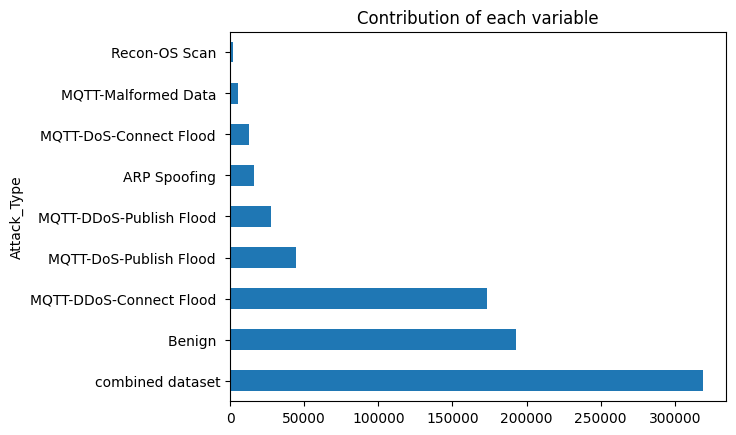

In [ ]:
combined_data['Attack_Type'].value_counts().plot(kind='barh');
plt.title("Contribution of each variable");

In [ ]:
combined_data['Attack_Type'].value_counts()

,count
Attack_Type,
combined dataset,318795
Benign,192732
MQTT-DDoS-Connect Flood,173036
MQTT-DoS-Publish Flood,44376
MQTT-DDoS-Publish Flood,27623
ARP Spoofing,16047
MQTT-DoS-Connect Flood,12773
MQTT-Malformed Data,5130
Recon-OS Scan,2073


In [ ]:
combined_data=combined_data[combined_data['Attack_Type']!='combined dataset']


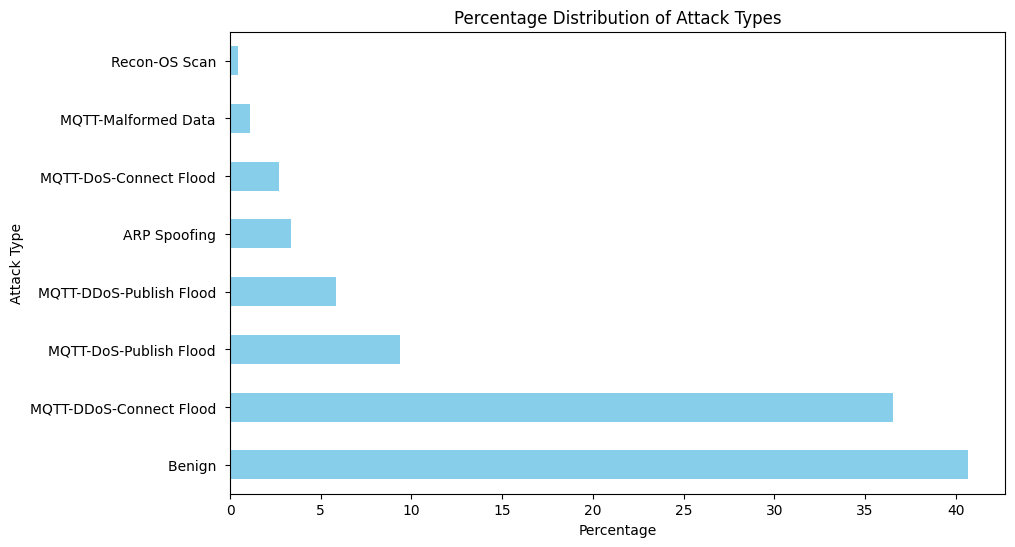

In [ ]:
# Plot the percentage distribution of Attack_Type
(combined_data['Attack_Type'].value_counts(normalize=True) * 100).plot(kind='barh', figsize=(10, 6), color='skyblue')

# Add labels and title for better readability
import matplotlib.pyplot as plt
plt.xlabel('Percentage')
plt.ylabel('Attack Type')
plt.title('Percentage Distribution of Attack Types')
plt.show()


In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473790 entries, 318795 to 792584
Data columns (total 46 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    473790 non-null  float64
 1   Protocol Type    473790 non-null  float64
 2   Duration         473790 non-null  float64
 3   Rate             473790 non-null  float64
 4   Srate            473790 non-null  float64
 5   Drate            473790 non-null  float64
 6   fin_flag_number  473790 non-null  float64
 7   syn_flag_number  473790 non-null  float64
 8   rst_flag_number  473790 non-null  float64
 9   psh_flag_number  473790 non-null  float64
 10  ack_flag_number  473790 non-null  float64
 11  ece_flag_number  473790 non-null  float64
 12  cwr_flag_number  473790 non-null  float64
 13  ack_count        473790 non-null  float64
 14  syn_count        473790 non-null  float64
 15  fin_count        473790 non-null  float64
 16  rst_count        473790 non-null  floa

In [ ]:
df=combined_data.dropna()
df.shape

(473789, 46)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting data (already done in the code)
y = df['Attack_Type']
X = df.drop('Attack_Type', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distributions
print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", y_train_resampled.value_counts())


Original class distribution:
 Attack_Type
Benign                      154090
MQTT-DDoS-Connect Flood     138378
MQTT-DoS-Publish Flood       35507
MQTT-DDoS-Publish Flood      22247
ARP Spoofing                 12855
MQTT-DoS-Connect Flood       10240
MQTT-Malformed Data           4089
Recon-OS Scan                 1625
Name: count, dtype: int64
Resampled class distribution:
 Attack_Type
MQTT-DoS-Connect Flood      154090
MQTT-DoS-Publish Flood      154090
Benign                      154090
MQTT-DDoS-Connect Flood     154090
MQTT-Malformed Data         154090
MQTT-DDoS-Publish Flood     154090
ARP Spoofing                154090
Recon-OS Scan               154090
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.stats import randint

# Standardize features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter search spaces
param_distributions = {
    'Logistic Regression': {'C': np.logspace(-4, 4, 20)},
    'SVM': {'C': np.logspace(-4, 4, 20), 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': randint(1, 20), 'min_samples_split': randint(2, 20)},
    'Gradient Boosting': {'n_estimators': randint(50, 200), 'learning_rate': np.linspace(0.01, 0.3, 10)},
    'XGBoost': {'n_estimators': randint(50, 200), 'learning_rate': np.linspace(0.01, 0.3, 10)},
    'k-NN': {'n_neighbors': randint(1, 20)}
}

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'k-NN': KNeighborsClassifier()
}

# Perform Randomized Search for each model
best_models = {}
for name, model in models.items():
    random_search = RandomizedSearchCV(model, param_distributions[name], n_iter=10, scoring='f1', cv=3, random_state=42, n_jobs=-1)
    random_search.fit(X_train_scaled if name in ['Logistic Regression', 'SVM', 'k-NN'] else X_train_resampled, y_train_resampled)
    best_models[name] = random_search.best_estimator_
    print(f'Best parameters for {name}: {random_search.best_params_}')

# Train best models
for name, model in best_models.items():
    model.fit(X_train_scaled if name in ['Logistic Regression', 'SVM', 'k-NN'] else X_train_resampled, y_train_resampled)

# Prepare data for LSTM
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

# Define and train LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train_lstm.shape[2])),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

# Make predictions
results = []
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled if name in ['Logistic Regression', 'SVM', 'k-NN'] else X_test)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    results.append((name, precision, recall, f1))

# LSTM Evaluation
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)
precision_lstm = precision_score(y_test, y_pred_lstm, average='binary')
recall_lstm = recall_score(y_test, y_pred_lstm, average='binary')
f1_lstm = f1_score(y_test, y_pred_lstm, average='binary')
results.append(('LSTM', precision_lstm, recall_lstm, f1_lstm))

# Convert results to DataFrame and print
results_df = pd.DataFrame(results, columns=['Model', 'Precision', 'Recall', 'F1-Score'])
print(results_df)
